In [1]:
import csv
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import datetime
data = pd.read_csv("events.csv")
data.head()

data2=pd.read_csv("ginf.csv")
data2.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [2]:
data.count()
data2.count()
lisst=["Manchester City","Liverpool","Manchester Utd","Tottenham","Chelsea","Arsenal","Real Madrid","Barcelona"]
sample= data2.loc[(data2['ht'].isin(lisst) | data2['at'].isin(lisst))]
sample.head()

ids=sample['id_odsp']
sample2=data.loc[data['id_odsp'].isin(ids)]
sample2.tail()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
940685,xSU9scI9/,xSU9scI994,94,85,Foul by Gary Cahill (Chelsea).,3,NaN,1,Chelsea,Hull,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
940686,xSU9scI9/,xSU9scI995,95,87,"Substitution, Chelsea. Michy Batshuayi replace...",7,NaN,1,Chelsea,Hull,...,michy batshuayi,diego costa,NaN,NaN,0,NaN,NaN,0,NaN,0
940687,xSU9scI9/,xSU9scI996,96,89,Foul by Michy Batshuayi (Chelsea).,3,NaN,1,Chelsea,Hull,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
940688,xSU9scI9/,xSU9scI997,97,89,Harry Maguire (Hull City) wins a free kick in ...,8,NaN,2,Hull,Chelsea,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
940689,xSU9scI9/,xSU9scI998,98,89,Attempt saved. Oumar Niasse (Hull City) left f...,1,12.0,2,Hull,Chelsea,...,NaN,NaN,5.0,1.0,0,9.0,2.0,1,1.0,0


In [3]:
#Messing the data ginf
change = sample.sample(100).index #Random Sampling to add NULL values in the data set
sample.loc[change,'odd_h'] = np.nan
sample['odd_h'].isnull().sum()

change = sample.sample(85).index
sample.loc[change,'ht'] = np.nan
sample['ht'].isnull().sum()

change = sample.sample(70).index
sample.loc[change,'league'] = np.nan
sample['league'].isnull().sum()

change = sample.sample(5).index
sample.loc[change,'ftag'] = np.nan
sample['ftag'].isnull().sum()

change = sample.sample(10).index
sample.loc[change,'season'] = np.nan
sample['season'].isnull().sum()



/home/arindam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


10

In [4]:
#messing the data events
change = sample2.sample(60).index
sample2.loc[change,'sort_order'] = np.nan

last_sample= sample2.loc[sample2['id_odsp']=='xSU9scI9/']

change = last_sample.sample(10).index
last_sample.loc[change,'event_type'] = np.nan
last_sample.loc[change,'bodypart'] = np.nan
last_sample.loc[change,'is_goal'] = np.nan

In [5]:
#Data Cleaning
sample.drop(sample.columns[[14,15,16,17]], axis = 1, inplace = True)


/home/arindam/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
cnt=0
sum=0;
for ind in sample.index:
    if(np.isnan(sample['odd_h'][ind]) and (sample['ht'][ind] in (lisst))):
        for indd in sample.index:
            if ~np.isnan(sample['odd_h'][indd]) and sample['ht'][indd]==sample['ht'][ind]:
                cnt+=1
                sum=sum+sample['odd_h'][indd]
        sample['odd_h'][ind]=sum/cnt
print(sample)

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/arindam/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


         id_odsp                                          link_odsp  \
20     4WY4SljB/  /soccer/england/premier-league-2011-2012/newca...   
30     nB6hTUz5/  /soccer/england/premier-league-2011-2012/liver...   
40     dUDqL6ro/  /soccer/england/premier-league-2011-2012/west-...   
45     xpXCQSKN/  /soccer/england/premier-league-2011-2012/stoke...   
46     CQJ2BZ8q/  /soccer/england/premier-league-2011-2012/manch...   
49     2Pyjt8KA/  /soccer/england/premier-league-2011-2012/chels...   
53     CzqwqAzh/  /soccer/england/premier-league-2011-2012/arsen...   
73     YkXosl54/  /soccer/england/premier-league-2011-2012/bolto...   
75     QVCWNa4q/  /soccer/england/premier-league-2011-2012/manch...   
83     EXAMtLeF/  /soccer/england/premier-league-2011-2012/chels...   
94     SzFQuuBL/  /soccer/england/premier-league-2011-2012/liver...   
101    Aa4VvaQR/  /soccer/england/premier-league-2011-2012/manch...   
102    C88uY13B/  /soccer/spain/primera-division-2011-2012/zarag...   
107   

In [7]:
for ind in sample.index:
    if pd.isna(sample['ht'][ind]):
        for indd in sample2.index:
            if(sample['id_odsp'][ind]==sample2['id_odsp'][indd]):
                break
        if(sample['at'][ind]==sample2['event_team'][indd]):
            sample['ht'][ind]=sample2['opponent'][indd]
        else:
            sample['ht'][ind]=sample2['event_team'][indd]
sample['ht'].isna().sum()

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0

In [8]:
for ind in sample.index:
    if pd.isna(sample['league'][ind]):
        if sample['country'][ind]=="england":
            sample['league'][ind]="E0"
        else:
            sample['league'][ind]="SP1"
sample['country'].isna().sum()     

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0

In [9]:
sample.date = pd.to_datetime(sample.date)
sample['year']= sample['date'].dt.year
sample['month']= sample['date'].dt.month
for ind in sample.index:
    if pd.isna(sample['season'][ind]):
        if sample['month'][ind]>8:
            sample['season'][ind]=sample['year'][ind]+1;
        else:
            sample['season'][ind]=sample['year'][ind];    
sample['date'].isna().sum()            

/home/arindam/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

0

In [10]:
for ind in sample.index:
    if pd.isna(sample['ftag'][ind]):
        for indd in sample2.index:
            if(sample['id_odsp'][ind]==sample2['id_odsp'][indd]):
                a=sample2['id_odsp'][indd];
                count=0
                while(1):
                    if(indd in sample2.index and sample2['id_odsp'][indd]==a):
                        if(sample2['is_goal'][indd] and sample['at'][ind]==sample2['event_team'][indd]):
                            print("goal")
                            count+=1
                        indd+=1
                    else:
                        break
                sample['ftag'][ind]=count
                break
sample['ftag'].isna().sum()             

goal
goal
goal


/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


goal
goal
goal


1

In [53]:
for ind in sample2.index:
    if pd.isna(sample2['sort_order'][ind]):
        if((ind+1) in sample2.index and sample2['id_odsp'][ind]==sample2['id_odsp'][ind+1]):
            sample2['sort_order'][ind]=sample2['sort_order'][ind+1]-1
        else:
            if (ind-1) in sample2.index:
                sample2['sort_order'][ind]=sample2['sort_order'][ind-1]+1
            else:
                continue
sample2['sort_order'].isna().sum()            

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0

In [12]:
event_types = {1:'Attempt', 2:'Corner', 3:'Foul', 4:'Yellow card', 5:'Second yellow card', 6:'Red card', 7:'Substitution', 8:'Free kick won', 9:'Offside', 10:'Hand ball', 11:'Penalty conceded'}
event_types2 = {12:'Key Pass', 13:'Failed through ball', 14:'Sending off', 15:'Own goal'}
sides = {1:'Home', 2:'Away'}
shot_places = {1:'Bit too high', 2:'Blocked', 3:'Bottom left corner', 4:'Bottom right corner', 5:'Centre of the goal', 6:'High and wide', 7:'Hits the bar', 8:'Misses to the left', 9:'Misses to the right', 10:'Too high', 11:'Top centre of the goal', 12:'Top left corner', 13:'Top right corner'}
shot_outcomes = {1:'On target', 2:'Off target', 3:'Blocked', 4:'Hit the bar'}
locations = {1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', 4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', 7:'Difficult angle on the left', 8:'Difficult angle on the right', 9:'Left side of the box', 10:'Left side of the six yard box', 11:'Right side of the box', 12:'Right side of the six yard box', 13:'Very close range', 14:'Penalty spot', 15:'Outside the box', 16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards', 19:'Not recorded'}
bodyparts = {1:'right foot', 2:'left foot', 3:'head'}
assist_methods = {0:np.nan, 1:'Pass', 2:'Cross', 3:'Headed pass', 4:'Through ball'}
situations = {1:'Open play', 2:'Set piece', 3:'Corner', 4:'Free kick'}

In [13]:
sample2['event_type'] = sample2['event_type'].map(event_types)
sample2['event_type2'] = sample2['event_type2'].map(event_types2)
sample2['side'] = sample2['side'].map(sides)
sample2['shot_place'] = sample2['shot_place'].map(shot_places)
sample2['shot_outcome'] = sample2['shot_outcome'].map(shot_outcomes)
sample2['location'] = sample2['location'].map(locations)
sample2['bodypart'] = sample2['bodypart'].map(bodyparts)
sample2['assist_method'] = sample2['assist_method'].map(assist_methods)
sample2['situation'] = sample2['situation'].map(situations)

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [14]:
last_sample['event_type'] = last_sample['event_type'].map(event_types)
last_sample['event_type2'] = last_sample['event_type2'].map(event_types2)
last_sample['side'] = last_sample['side'].map(sides)
last_sample['shot_place'] = last_sample['shot_place'].map(shot_places)
last_sample['shot_outcome'] = last_sample['shot_outcome'].map(shot_outcomes)
last_sample['location'] = last_sample['location'].map(locations)
last_sample['bodypart'] = last_sample['bodypart'].map(bodyparts)
last_sample['assist_method'] = last_sample['assist_method'].map(assist_methods)
last_sample['situation'] = last_sample['situation'].map(situations)

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [15]:
def isSubstring(s1, s2): 
    M = len(s1) 
    N = len(s2) 
    for i in range(N - M + 1): 
        for j in range(M): 
            if (s2[i + j] != s1[j]): 
                break
        if j + 1 == M : 
            return i 
    return 0

a=event_types.values()
b=bodyparts.values()

for ind in last_sample.index:
    if(pd.isna(last_sample['is_goal'][ind])):
        if(isSubstring(last_sample['text'][ind],'Goal')):
            last_sample['is_goal'][ind]=1
        else:
            last_sample['is_goal'][ind]=0
    for i in a:
        if(isSubstring(last_sample['text'][ind],i)):
            last_sample['event_type'][ind]=i
    for p in b:
         if(isSubstring(last_sample['text'][ind],p)):
            last_sample['bodypart'][ind]=p

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
data['event_type'] = data['event_type'].map(event_types)
data['event_type2'] = data['event_type2'].map(event_types2)
data['side'] = data['side'].map(sides)
data['shot_place'] = data['shot_place'].map(shot_places)
data['shot_outcome'] = data['shot_outcome'].map(shot_outcomes)
data['location'] = data['location'].map(locations)
data['bodypart'] = data['bodypart'].map(bodyparts)
data['assist_method'] = data['assist_method'].map(assist_methods)
data['situation'] = data['situation'].map(situations)

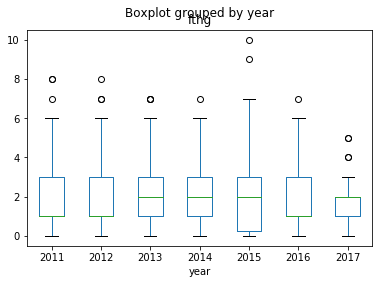

In [60]:
sample1=sample
sample1.boxplot(by ='year', column =['fthg'], grid = False) 

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


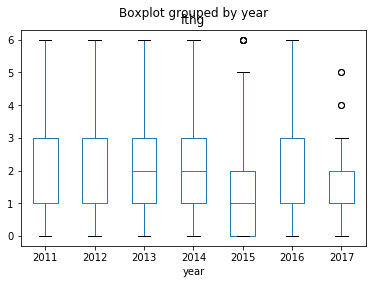

In [66]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(sample['fthg']))
Q1 = sample1['fthg'].quantile(0.25)
Q3 = sample1['fthg'].quantile(0.75)
IQR = Q3 - Q1
sample1['fthg'] = sample1['fthg'][~((sample1['fthg'] < (Q1 - 1.5 * IQR)) | (sample1['fthg'] > (Q3 + 1.5 * IQR)))]
sample1.boxplot(by ='year', column =['fthg'], grid = False) 

In [17]:
cats = ['id_odsp', 'event_type', 'player', 'player2', 'event_team', 'opponent', 'shot_place', 'shot_outcome', 'location', 'bodypart', 'assist_method', 'situation']
d = dict.fromkeys(cats,'category')
data = data.astype(d)
data['is_goal'] = data['is_goal'].astype('bool')

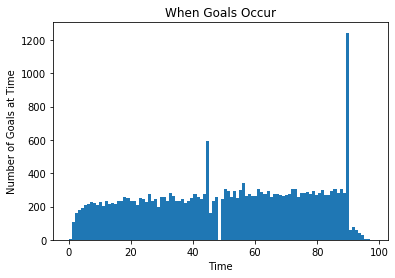

In [18]:
goals = data[data['is_goal'] == True]
plt.hist(goals.time, 100)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")
plt.title("When Goals Occur")
plt.show()

In [19]:
ninetiethMin = goals[goals['time'] == 90]
eightyNinthMin =  goals[goals['time'] == 89]
ninetiethMin['dupes'] = ninetiethMin['id_odsp'].duplicated(keep=False)
eightyNinthMin['dupes'] = eightyNinthMin['id_odsp'].duplicated(keep=False)
multiNinetiethGoals = ninetiethMin[ninetiethMin['dupes'] == True]
multiEightyNinthGoals = eightyNinthMin[eightyNinthMin['dupes'] == True]
print("There were " + str(len(ninetiethMin)) + " goals in the 90th minute vs. " + str(len(eightyNinthMin)) + " in the 89th.\n" + str(len(multiNinetiethGoals)) + " times, there were multiple goals in the 90th minute, vs. " + str(len(multiEightyNinthGoals)) + " multiples in the 89th.")

There were 1244 goals in the 90th minute vs. 283 in the 89th.
120 times, there were multiple goals in the 90th minute, vs. 0 multiples in the 89th.


/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


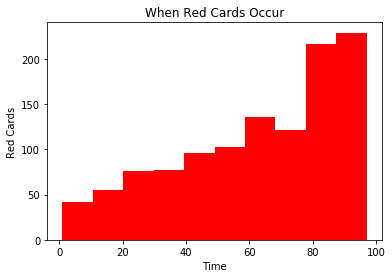

In [20]:
redCards = data[data['event_type'] == 'Red card'] 
reds = plt.hist(redCards.time, 10, color="red")
plt.xlabel("Time")
plt.ylabel("Red Cards")
plt.title("When Red Cards Occur")
plt.show()

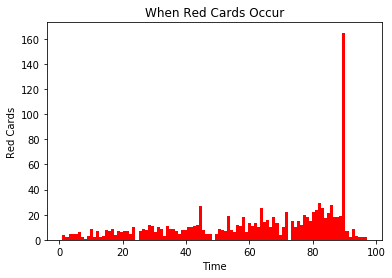

In [21]:
reds = plt.hist(redCards.time, 100, color="red")
plt.xlabel("Time")
plt.ylabel("Red Cards")
plt.title("When Red Cards Occur")
plt.show()

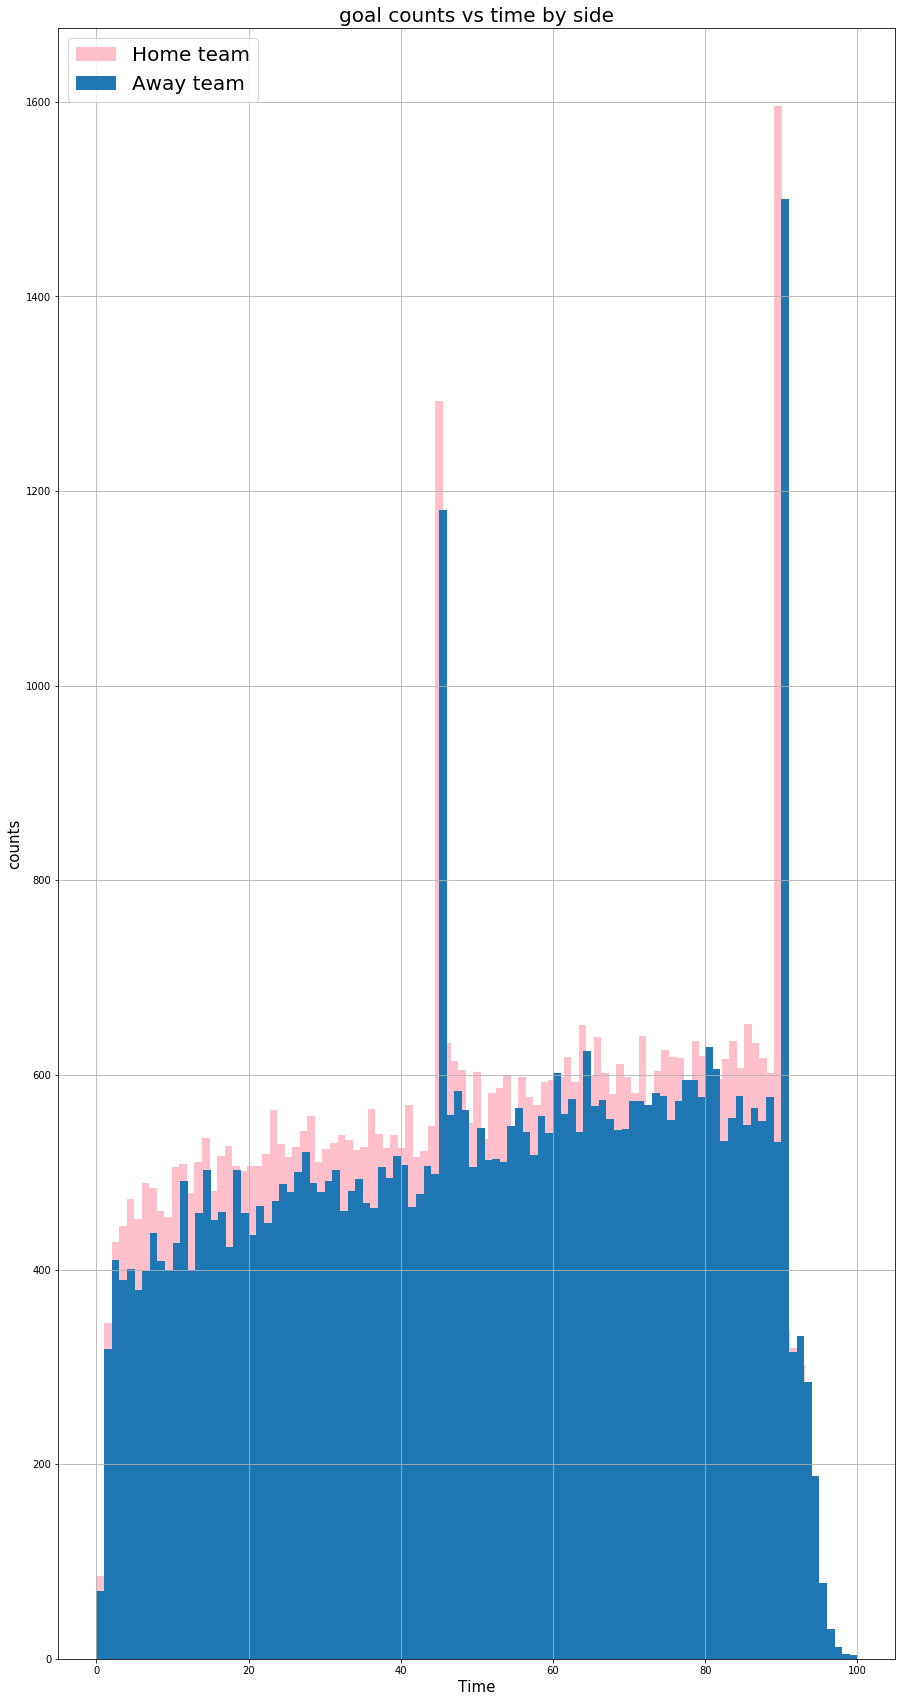

In [22]:
fig=plt.figure(figsize=(15,30))
plt.grid()

plt.hist(sample2[sample2.side=='Home'].time,bins=100,label="Home team",color='pink',width=1)
plt.hist(sample2[sample2.side=='Away'].time,bins=100,label="Away team",width=1)

plt.xlabel("Time",fontsize=15)
plt.ylabel("counts",fontsize=15)
plt.title("goal counts vs time by side",fontsize=20)
plt.legend(loc="upper left",fontsize=20)
plt.show()

In [23]:
sample['at'].isin(lisst).sum()

845

In [24]:
sample['ht'].isin(lisst).sum()

833

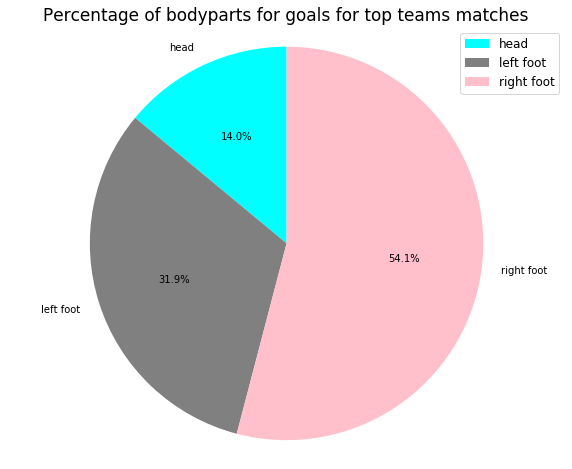

In [25]:
plt.figure(figsize=(10,8))
data1=sample2.groupby(by=['bodypart'])['bodypart'].count()
colors=["cyan","grey","pink"]
plt.pie(data1,colors=colors,autopct='%1.1f%%',labels=['head','left foot','right foot'],startangle=90)
plt.axis('equal')
plt.title("Percentage of bodyparts for goals for top teams matches",fontsize=17)
plt.legend(fontsize=12,loc='upper right')
plt.show()

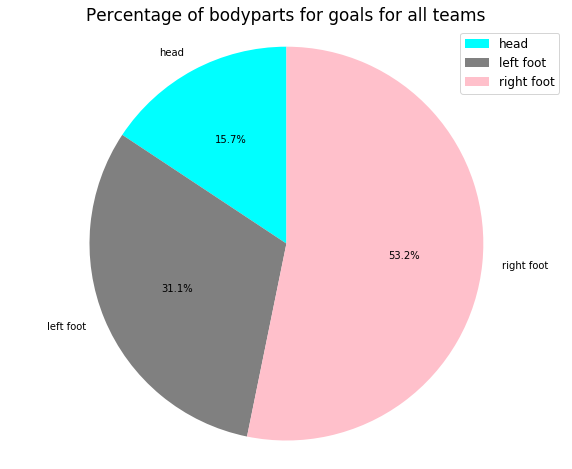

In [26]:
plt.figure(figsize=(10,8))
data1=data.groupby(by=['bodypart'])['bodypart'].count()
colors=["cyan","grey","pink"]
plt.pie(data1,colors=colors,autopct='%1.1f%%',labels=['head','left foot','right foot'],startangle=90)
plt.axis('equal')
plt.title("Percentage of bodyparts for goals for all teams",fontsize=17)
plt.legend(fontsize=12,loc='upper right')
plt.show()

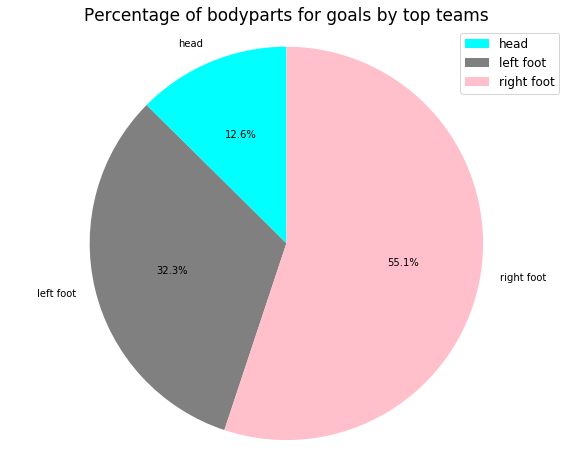

In [27]:
plt.figure(figsize=(10,8))
data1=sample2.loc[sample2['event_team'].isin(lisst)].groupby(by=['bodypart'])['bodypart'].count()
colors=["cyan","grey","pink"]
plt.pie(data1,colors=colors,autopct='%1.1f%%',labels=['head','left foot','right foot'],startangle=90)
plt.axis('equal')
plt.title("Percentage of bodyparts for goals by top teams",fontsize=17)
plt.legend(fontsize=12,loc='upper right')
plt.show()

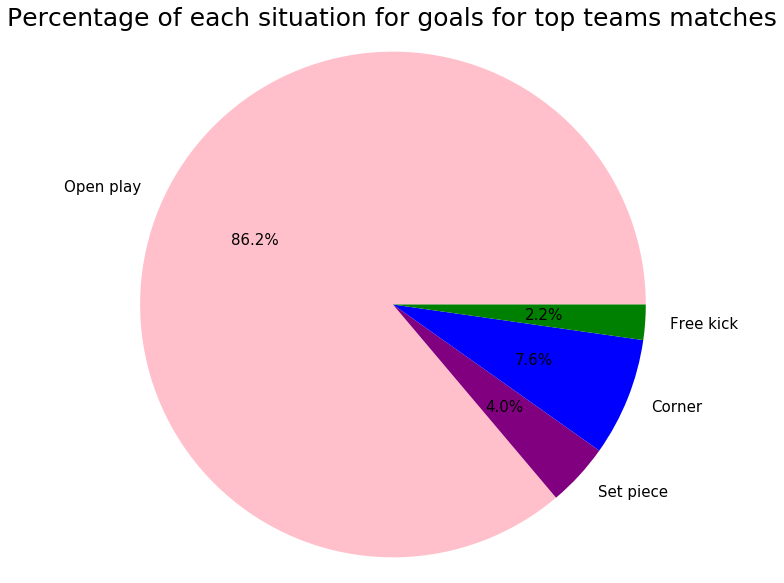

In [28]:
plt.figure(figsize=(10,10))
size=[sample2[sample2.situation=='Open play'].shape[0],sample2[sample2.situation=='Set piece'].shape[0],sample2[sample2.situation=='Corner'].shape[0],sample2[sample2.situation=='Free kick'].shape[0]]
colors=['pink','purple','blue','green']
plt.pie(size,colors=colors,autopct='%.1f%%',textprops={"fontsize":15},labels=['Open play','Set piece','Corner','Free kick'])
plt.title('Percentage of each situation for goals for top teams matches',fontsize=25)
plt.axis('equal')
plt.show()

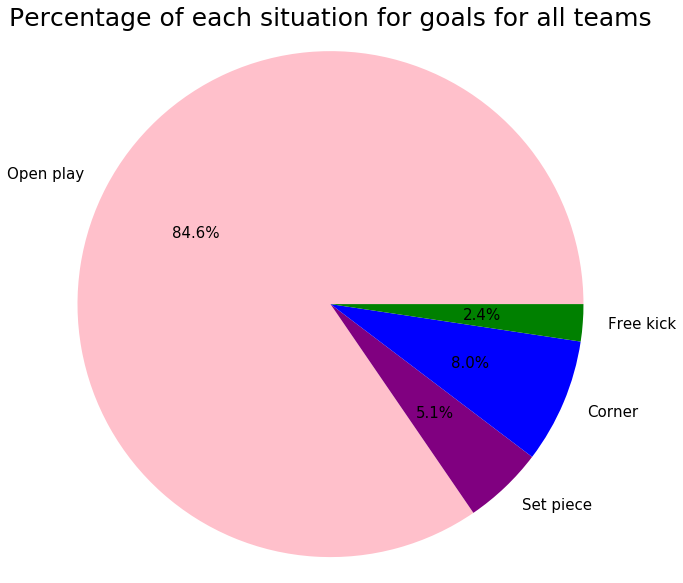

In [29]:
plt.figure(figsize=(10,10))
size=[data[data.situation=='Open play'].shape[0],data[data.situation=='Set piece'].shape[0],data[data.situation=='Corner'].shape[0],data[data.situation=='Free kick'].shape[0]]
colors=['pink','purple','blue','green']
plt.pie(size,colors=colors,autopct='%.1f%%',textprops={"fontsize":15},labels=['Open play','Set piece','Corner','Free kick'])
plt.title('Percentage of each situation for goals for all teams',fontsize=25)
plt.axis('equal')
plt.show()

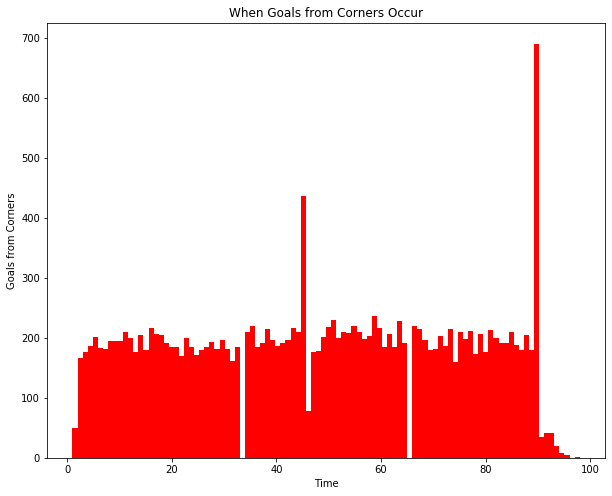

In [30]:
plt.figure(figsize=(10,8))
cornergoals = data[data.situation == 'Corner'] 
corner = plt.hist(cornergoals.time, 100, color="red")
plt.xlabel("Time")
plt.ylabel("Goals from Corners")
plt.title("When Goals from Corners Occur")
plt.show()

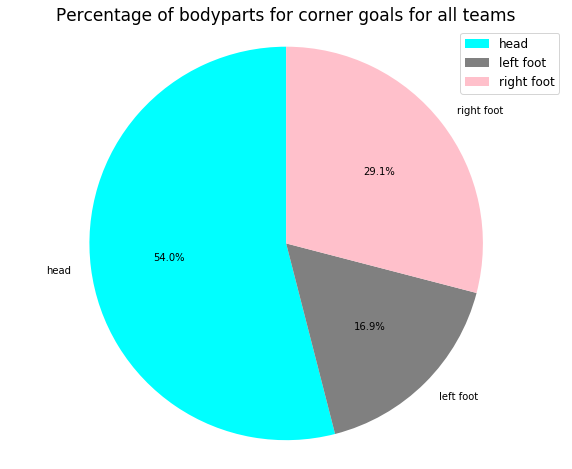

In [31]:
plt.figure(figsize=(10,8))
data1=cornergoals.groupby(by=['bodypart'])['bodypart'].count()
colors=["cyan","grey","pink"]
plt.pie(data1,colors=colors,autopct='%1.1f%%',labels=['head','left foot','right foot'],startangle=90)
plt.axis('equal')
plt.title("Percentage of bodyparts for corner goals for all teams",fontsize=17)
plt.legend(fontsize=12,loc='upper right')
plt.show()

/home/arindam/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


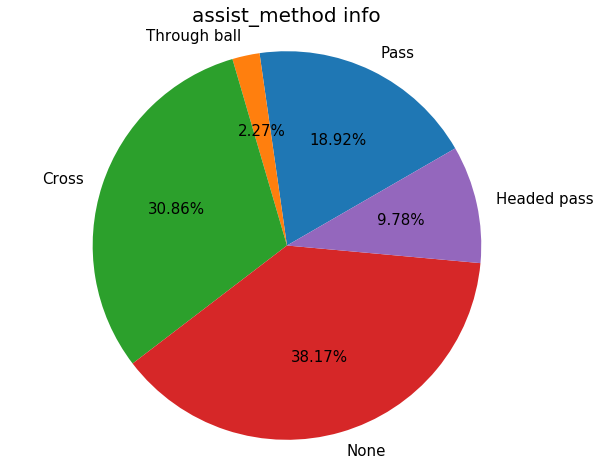

In [32]:
sample3=sample2.loc[sample2['is_goal']==1]
sample3.replace({np.nan:"None"},inplace=True)
sample3.groupby(by='assist_method')['time'].count()
plt.figure(figsize=(10,8))
plt.pie(sample3.groupby(by='assist_method for top team matches')['time'].count(),labels=set(list(sample3.assist_method)),autopct='%1.2f%%',textprops={'fontsize':15,'color':'black'},startangle=30)
plt.title("assist_method info",fontsize=20)
plt.axis('equal')
plt.show()


In [33]:
analyse=sample.loc[sample.at=="Manchester City" or sample.ht=="Manchester City"]
analysis=sample2.loc[sample2['id_odsp'].isin(analyse['id_odsp'])]
analysis

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
331637,ngSc9LPO/,ngSc9LPO1,1.0,3,Foul by Leon Osman (Everton).,Foul,NaN,Away,Everton,Manchester City,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
331638,ngSc9LPO/,ngSc9LPO2,2.0,3,James Milner (Manchester City) wins a free kic...,Free kick won,NaN,Home,Manchester City,Everton,...,NaN,NaN,NaN,NaN,0,Attacking half,NaN,NaN,NaN,0
331639,ngSc9LPO/,ngSc9LPO3,3.0,4,Attempt saved. Yaya Toure (Manchester City) ri...,Attempt,Key Pass,Home,Manchester City,Everton,...,NaN,NaN,Bottom right corner,On target,0,Outside the box,right foot,Pass,Open play,0
331640,ngSc9LPO/,ngSc9LPO4,4.0,4,"Corner, Manchester City. Conceded by Tim Howard.",Corner,NaN,Home,Manchester City,Everton,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
331641,ngSc9LPO/,ngSc9LPO5,5.0,5,Sergio Aguero (Manchester City) wins a free ki...,Free kick won,NaN,Home,Manchester City,Everton,...,NaN,NaN,NaN,NaN,0,Attacking half,NaN,NaN,NaN,0
331642,ngSc9LPO/,ngSc9LPO6,6.0,6,Attempt missed. Aleksandar Kolarov (Manchester...,Attempt,NaN,Home,Manchester City,Everton,...,NaN,NaN,Misses to the right,Off target,0,Outside the box,left foot,NaN,Free kick,0
331643,ngSc9LPO/,ngSc9LPO7,7.0,7,Fernandinho (Manchester City) wins a free kick...,Free kick won,NaN,Home,Manchester City,Everton,...,NaN,NaN,NaN,NaN,0,Defensive half,NaN,NaN,NaN,0
331644,ngSc9LPO/,ngSc9LPO8,8.0,7,Foul by Steven Naismith (Everton).,Foul,NaN,Away,Everton,Manchester City,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
331645,ngSc9LPO/,ngSc9LPO9,9.0,8,Foul by Pablo Zabaleta (Manchester City).,Foul,NaN,Home,Manchester City,Everton,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
331646,ngSc9LPO/,ngSc9LPO10,10.0,8,Steven Naismith (Everton) wins a free kick in ...,Free kick won,NaN,Away,Everton,Manchester City,...,NaN,NaN,NaN,NaN,0,Defensive half,NaN,NaN,NaN,0


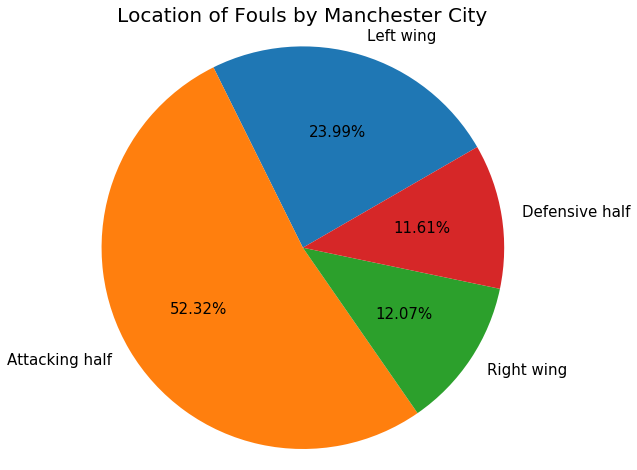

In [34]:
samples=analysis.loc[analysis.event_team!="Manchester City"]
sampless=samples.loc[samples.event_type=="Free kick won"]
sampless.groupby(by='location')['time'].count()
plt.figure(figsize=(8,8))
plt.pie(sampless.groupby(by='location')['time'].count(),labels=set(list(sampless.location)),autopct='%1.2f%%',textprops={'fontsize':15,'color':'black'},startangle=30)
plt.title("Location of Fouls by Manchester City",fontsize=20)
plt.axis('equal')
plt.show()

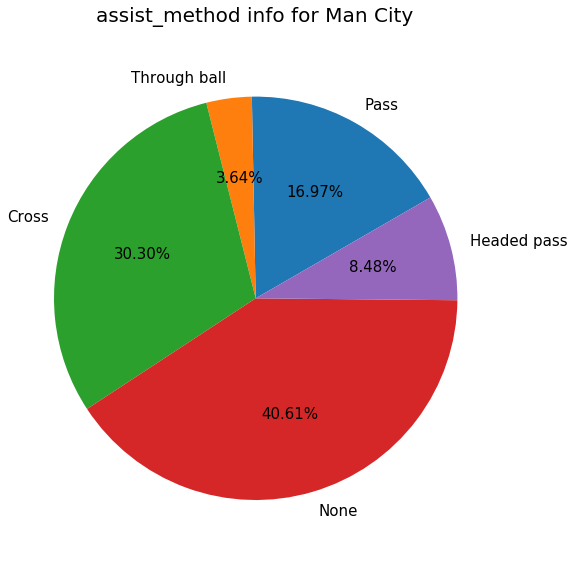

In [35]:
samples1=analysis.loc[analysis['is_goal']==1]
sampless1=samples1.loc[samples1['event_team']=="Manchester City"]
sampless1.replace({np.nan:"None"},inplace=True)
sampless1.groupby(by='assist_method')['time'].count()
plt.figure(figsize=(8,10))
plt.pie(sampless1.groupby(by='assist_method')['time'].count(),labels=set(list(sampless1.assist_method)),autopct='%1.2f%%',textprops={'fontsize':15,'color':'black'},startangle=30)
plt.title("assist_method info for Man City",fontsize=20)
plt.axis('equal')
plt.show()


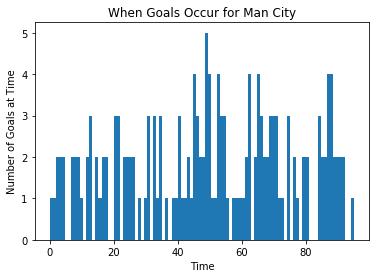

In [36]:
plt.hist(sampless1.time, 100)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")
plt.title("When Goals Occur for Man City")
plt.show()

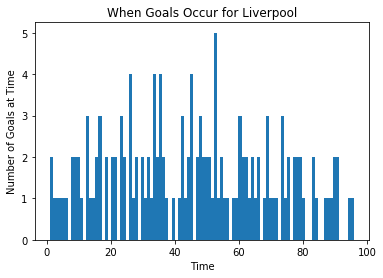

In [37]:
analyse=sample.loc[sample.at=="Liverpool" or sample.ht=="Liverpool"]
analysis=sample2.loc[sample2['id_odsp'].isin(analyse['id_odsp'])]
samples1=analysis.loc[analysis['is_goal']==1]
sampless1=samples1.loc[samples1['event_team']=="Liverpool"]
plt.hist(sampless1.time, 100)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")
plt.title("When Goals Occur for Liverpool")
plt.show()


/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


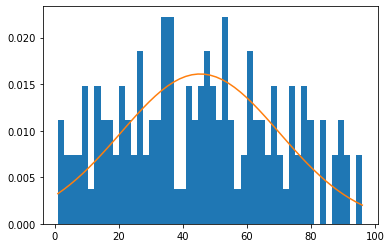

In [38]:
a=sampless1['time']
from matplotlib import pyplot as pyplot
from scipy.stats import norm

n, bins, patches = pyplot.hist(a, 50, normed=1)
mu=np.mean(a)
sigma = np.std(a)
pyplot.plot(bins, norm.pdf(bins, mu, sigma))

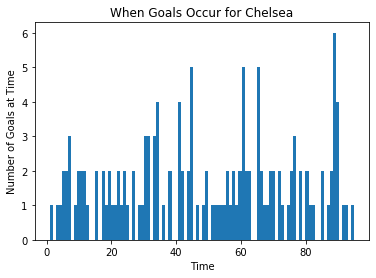

In [39]:
analyse=sample.loc[sample.at=="Chelsea" or sample.ht=="Chelsea"]
analysis=sample2.loc[sample2['id_odsp'].isin(analyse['id_odsp'])]
samples1=analysis.loc[analysis['is_goal']==1]
sampless1=samples1.loc[samples1['event_team']=="Chelsea"]
plt.hist(sampless1.time, 100)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")
plt.title("When Goals Occur for Chelsea")
plt.show()

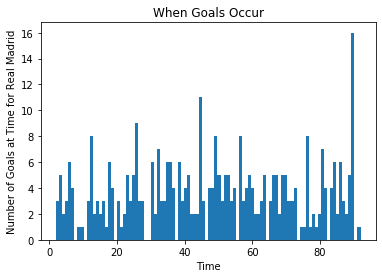

In [40]:
analyse=sample.loc[sample.at=="Real Madrid" or sample.ht=="Real Madrid"]
analysis=sample2.loc[sample2['id_odsp'].isin(analyse['id_odsp'])]
samples1=analysis.loc[analysis['is_goal']==1]
sampless1=samples1.loc[samples1['event_team']=="Real Madrid"]

plt.hist(sampless1.time, 100)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")
plt.title("When Goals Occur for Madrid")
plt.show()

/home/arindam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


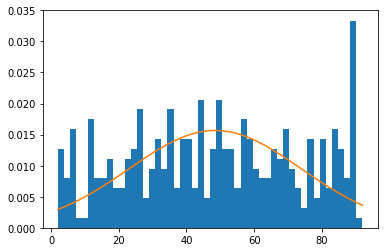

In [41]:
a=sampless1['time']
from matplotlib import pyplot as pyplot
from scipy.stats import norm

n, bins, patches = pyplot.hist(a, 50, normed=1)
mu=np.mean(a)
sigma = np.std(a)
pyplot.plot(bins, norm.pdf(bins, mu, sigma))

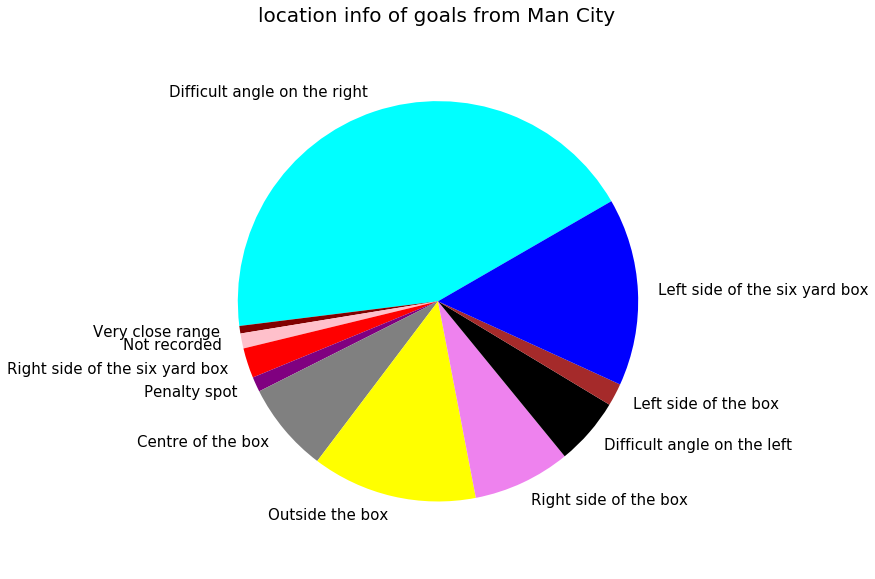

In [42]:
analyse=sample.loc[sample.at=="Manchester City" or sample.ht=="Manchester City"]
analysis=sample2.loc[sample2['id_odsp'].isin(analyse['id_odsp'])]
samples1=analysis.loc[analysis['event_team']=="Manchester City"]
sampless1=samples1.loc[samples1['is_goal']==1]

sampless1.replace({np.nan:"None"},inplace=True)
sampless1.groupby(by='location')['time'].count()
colors=["cyan","maroon","pink","red","purple","grey","yellow","violet","black","brown","blue"]
plt.figure(figsize=(8,10))
plt.pie(sampless1.groupby(by='location')['time'].count(),colors=colors,labels=set(list(sampless1.location)),textprops={'fontsize':15,'color':'black'},startangle=30)
plt.title("location info of goals from Man City",fontsize=20)
plt.axis('equal')
plt.show()


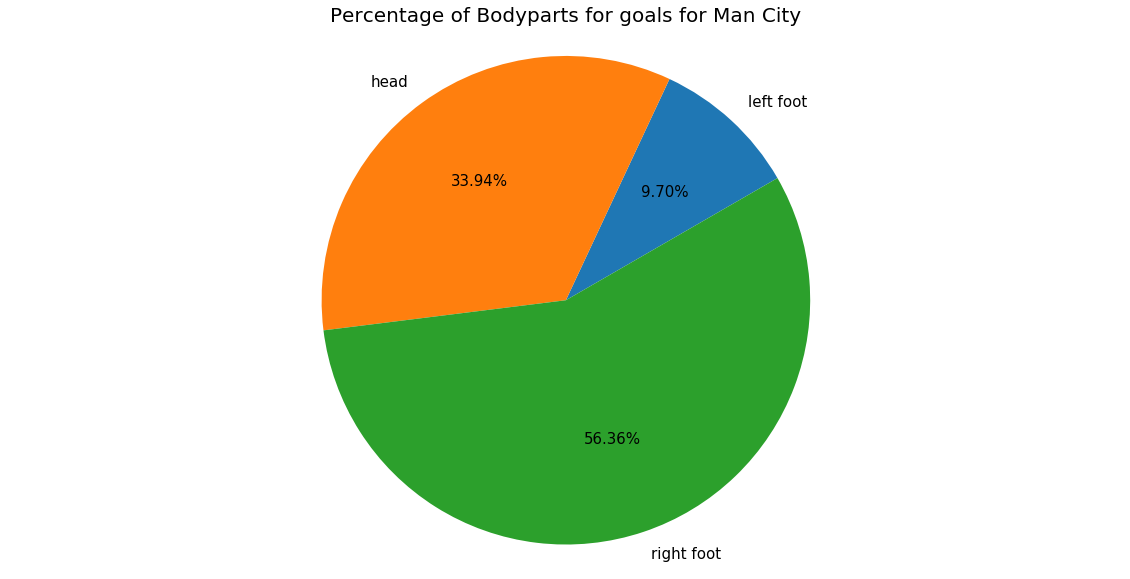

In [43]:
sampless1.replace({np.nan:"None"},inplace=True)
sampless1.groupby(by='bodypart')['time'].count()

plt.figure(figsize=(20,10))
plt.pie(sampless1.groupby(by='bodypart')['time'].count(),labels=set(list(sampless1.bodypart)),autopct='%1.2f%%',textprops={'fontsize':15,'color':'black'},startangle=30)
plt.title("Percentage of Bodyparts for goals for Man City",fontsize=20)
plt.axis('equal')
plt.show()

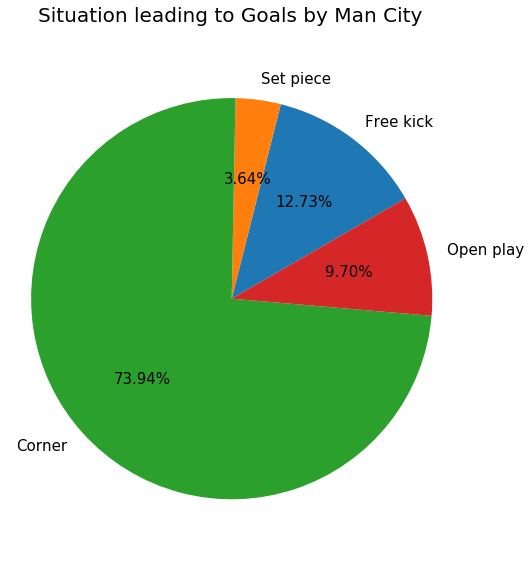

In [44]:
sampless1.groupby(by='situation')['time'].count()
plt.figure(figsize=(8,10))
plt.pie(sampless1.groupby(by='situation')['time'].count(),labels=set(list(sampless1.situation)),autopct='%1.2f%%',textprops={'fontsize':15,'color':'black'},startangle=30)
plt.title("Situation leading to Goals by Man City",fontsize=20)
plt.axis('equal')
plt.show()

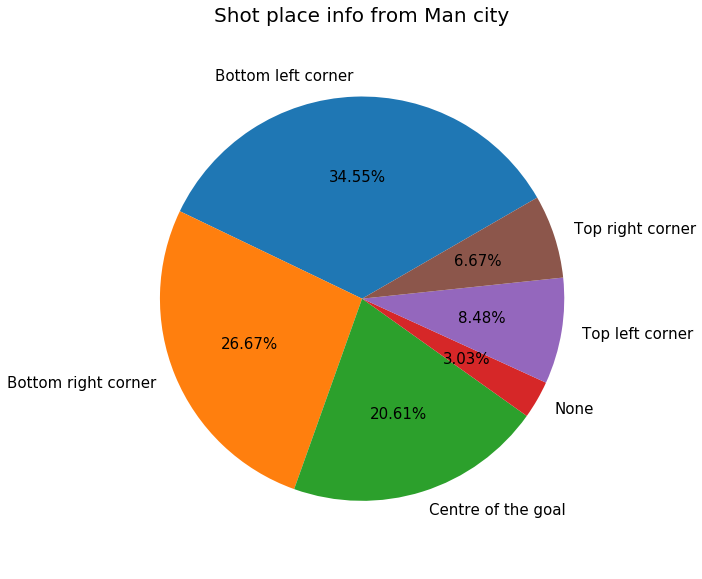

In [45]:
sampless1.groupby(by='shot_place')['time'].count()
plt.figure(figsize=(8,10))
plt.pie(sampless1.groupby(by='shot_place')['time'].count(),labels=set(list(sampless1.shot_place)),autopct='%1.2f%%',textprops={'fontsize':15,'color':'black'},startangle=30)
plt.title("Shot place info from Man city",fontsize=20)
plt.axis('equal')
plt.show()

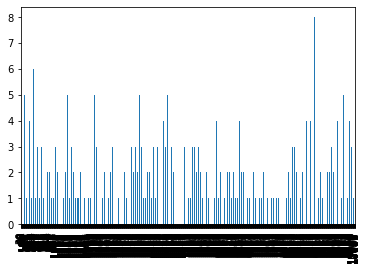

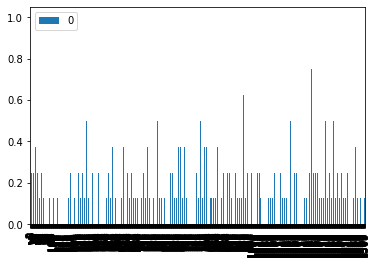

In [46]:
sample['ftag'].plot(kind='bar')

x = sample[['ftag']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.plot(kind='bar')



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


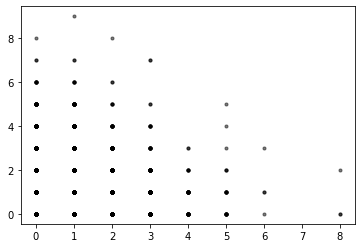

In [47]:
gif=sample.sample(1000)
x = gif.ftag
y = gif.fthg
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


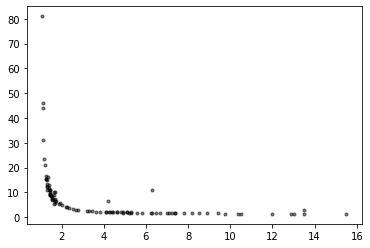

In [48]:
gif=sample.sample(100)
x = gif.odd_h
y = gif.odd_a
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

In [49]:
eif=sample2.sample(100)
eif.corr()

,sort_order,time,is_goal,fast_break
sort_order,1.000000,0.953125,0.076056,NaN
time,0.953125,1.000000,0.174410,NaN
is_goal,0.076056,0.174410,1.000000,NaN
fast_break,NaN,NaN,NaN,NaN


In [50]:
gif.corr()

,adv_stats,season,fthg,ftag,odd_h,odd_d,odd_a,year,month
adv_stats,1.000000,0.697061,0.069169,0.179877,0.147085,0.146573,0.033578,0.691687,-0.088443
season,0.697061,1.000000,0.123003,0.004318,-0.045949,0.138597,0.109526,0.957013,-0.016092
fthg,0.069169,0.123003,1.000000,-0.126516,-0.329316,0.376434,0.469189,0.044436,0.252121
ftag,0.179877,0.004318,-0.126516,1.000000,0.401207,-0.202107,-0.356702,0.007076,-0.046996
odd_h,0.147085,-0.045949,-0.329316,0.401207,1.000000,-0.101498,-0.436130,-0.019925,-0.097206
odd_d,0.146573,0.138597,0.376434,-0.202107,-0.101498,1.000000,0.920374,0.165215,-0.049651
odd_a,0.033578,0.109526,0.469189,-0.356702,-0.436130,0.920374,1.000000,0.128848,-0.018339
year,0.691687,0.957013,0.044436,0.007076,-0.019925,0.165215,0.128848,1.000000,-0.288198
month,-0.088443,-0.016092,0.252121,-0.046996,-0.097206,-0.049651,-0.018339,-0.288198,1.000000


In [51]:
from scipy.stats import ttest_ind
analyse1=sample.loc[sample.ht=="Real Madrid"]
analyse=sample.loc[sample.at=="Barcelona" or sample.ht=="Barcelona"]
a=ttest_ind(analyse1.fthg,analyse.fthg)
print(a)

Ttest_indResult(statistic=0.13792610953338993, pvalue=0.890432888448969)


In [52]:
a=ttest_ind(analyse1.odd_a,analyse.odd_a)
print(a)

Ttest_indResult(statistic=-3.2656716791787823, pvalue=0.001278027245655227)
